# Data604 Final Project

Using SimPy, write a process simulation that includes waiting time (discrete event simulation). 
You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.

## State the problem and its significance

The nail salon model is a simulation of a getting nail service with a limited number of employees and a number of customers that arrive at the nail salon to get nails done.

The process: 
1. When a customer arrives at the salon, it requests a service
2. Once it got one, it starts the nail polish processes and waits for it to finish. 
3. They finally finishes and leaves.

Flowchart
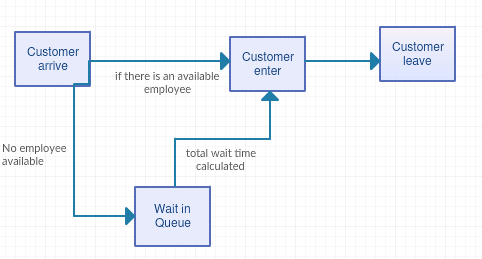

In [255]:
"""
Covers:
- Waiting for other processes
- Resources: Resource
Scenario:
  A nail salon has a limited number of employees and defines
  a nail polish processes that takes some (random) time.
  Customers arrive at the salon at a random time. If one employee is available, they start the service and wait for it
  to finish. If not, they wait until they an use one.
"""

import random
import simpy
import statistics

wait_times =[]
RANDOM_SEED = 42
num_employees = 2 # Number of employees in the salon
serv_time = 15 # Minutes it takes to get nail done
t_inter = 8 # Create a customer every ~7 minutes
sim_time = 40 # Simulation time in minutes


class nailsalon(object):
    """A nail salon has a limited number of employees (``NUM_EMPLOYEES``) to provide a service in parallel.
    Customers have to request one of the employees. When they got one, they
    can start the nail polish processes and wait for it to finish (which
    takes ``SERV_TIME`` minutes)."""
    def __init__(self, env, num_employees, serv_time): 
        self.env = env
        self.employee = simpy.Resource(env, num_employees)
        self.serv_time = serv_time
   
    def nail_polish(self, customer):
        yield self.env.timeout(serv_time)
        print("Service finished %d%% of %s." % (random.randint(1, 99), customer))


In [256]:
def customer(env, name, ns):
    """The nail polish process (each customer has a ``name``) arrives at the nail salon (``ns``) and requests a service.
    It then starts the nail polish process, waits for it to finish and
    leaves to never come back ...
    """
    arrival_time = env.now
    print('%s arrives at the nail salon at %.2f.' % (name, env.now)) 
    with ns.employee.request() as request:
        yield request
        print('%s enters the nail salon at %.2f.' % (name, env.now))
        wait_times.append(env.now - arrival_time)

        yield env.process(ns.nail_polish(name))
        print('%s leaves the nail salon at %.2f.' % (name, env.now))
    

In [257]:
def setup(env, num_employees, serv_time, t_inter):
    """create a nailservice with a number of initial customers and keep creating customers approximataly every t_inter time """
    nail_service = nailsalon(env, num_employees, serv_time)
    
    """create 4 initial customers"""
    for i in range(4):
        env.process(customer(env, 'Customer %d' % i, nail_service))
    """create more customer while it's running"""
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2)) 
        i += 1
        env.process(customer(env, 'Customer %d' % i, nail_service))



In [258]:
# Start simulation
print("Welcome to nail salon")
random.seed(RANDOM_SEED)

# Create an environment and setup
env = simpy.Environment()
env.process(setup(env, num_employees, serv_time, t_inter))

Welcome to nail salon


<Process(setup) object at 0x10b7bcd10>

In [259]:
# Run simulation
env.run(until=sim_time)

Customer 0 arrives at the nail salon at 0.00.
Customer 1 arrives at the nail salon at 0.00.
Customer 2 arrives at the nail salon at 0.00.
Customer 3 arrives at the nail salon at 0.00.
Customer 0 enters the nail salon at 0.00.
Customer 1 enters the nail salon at 0.00.
Customer 4 arrives at the nail salon at 6.00.
Customer 5 arrives at the nail salon at 12.00.
Service finished 32% of Customer 0.
Service finished 29% of Customer 1.
Customer 0 leaves the nail salon at 15.00.
Customer 1 leaves the nail salon at 15.00.
Customer 2 enters the nail salon at 15.00.
Customer 3 enters the nail salon at 15.00.
Customer 6 arrives at the nail salon at 20.00.
Customer 7 arrives at the nail salon at 27.00.
Service finished 87% of Customer 2.
Service finished 95% of Customer 3.
Customer 2 leaves the nail salon at 30.00.
Customer 3 leaves the nail salon at 30.00.
Customer 4 enters the nail salon at 30.00.
Customer 5 enters the nail salon at 30.00.
Customer 8 arrives at the nail salon at 33.00.


In [260]:
def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [261]:
mins, secs, = get_average_wait_time(wait_times)
print("Runniing simulation...", f"\nWhen the number of employee is {num_employees}, the average wait time is {mins} minutes and {secs} seconds.")

Runniing simulation... 
When the number of employee is 2, the average wait time is 12 minutes and 0 seconds.


In [262]:
wait_times3 =[]
num_employees3 = 3

def customer(env, name, ns):
    """The nail polish process (each customer has a ``name``) arrives at the nail salon (``ns``) and requests a service.
    It then starts the nail polish process, waits for it to finish and
    leaves to never come back ...
    """
    arrival_time = env.now
    print('%s arrives at the nail salon at %.2f.' % (name, env.now)) 
    with ns.employee.request() as request:
        yield request
        print('%s enters the nail salon at %.2f.' % (name, env.now))
        wait_times3.append(env.now - arrival_time)

        yield env.process(ns.nail_polish(name))
        print('%s leaves the nail salon at %.2f.' % (name, env.now))

# Start simulation
print("Welcome to nail salon")
random.seed(RANDOM_SEED)

# Create an environment and setup
env = simpy.Environment()
env.process(setup(env, num_employees3, serv_time, t_inter))

env.run(until=sim_time)

def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times3)
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

mins, secs, = get_average_wait_time(wait_times)
print("Runniing simulation...", f"\nWhen the number of employee is {num_employees3}, the average wait time is {mins} minutes and {secs} seconds.")

Welcome to nail salon
Customer 0 arrives at the nail salon at 0.00.
Customer 1 arrives at the nail salon at 0.00.
Customer 2 arrives at the nail salon at 0.00.
Customer 3 arrives at the nail salon at 0.00.
Customer 0 enters the nail salon at 0.00.
Customer 1 enters the nail salon at 0.00.
Customer 2 enters the nail salon at 0.00.
Customer 4 arrives at the nail salon at 6.00.
Customer 5 arrives at the nail salon at 12.00.
Service finished 32% of Customer 0.
Service finished 29% of Customer 1.
Service finished 18% of Customer 2.
Customer 0 leaves the nail salon at 15.00.
Customer 1 leaves the nail salon at 15.00.
Customer 2 leaves the nail salon at 15.00.
Customer 3 enters the nail salon at 15.00.
Customer 4 enters the nail salon at 15.00.
Customer 5 enters the nail salon at 15.00.
Customer 6 arrives at the nail salon at 20.00.
Customer 7 arrives at the nail salon at 26.00.
Service finished 12% of Customer 3.
Service finished 76% of Customer 4.
Service finished 55% of Customer 5.
Custome

In [263]:
# when the number of employee is 4

wait_times4 =[]
num_employees4 = 4

def customer(env, name, ns):
    """The nail polish process (each customer has a ``name``) arrives at the nail salon (``ns``) and requests a service.
    It then starts the nail polish process, waits for it to finish and
    leaves to never come back ...
    """
    arrival_time = env.now
    print('%s arrives at the nail salon at %.2f.' % (name, env.now)) 
    with ns.employee.request() as request:
        yield request
        print('%s enters the nail salon at %.2f.' % (name, env.now))
        wait_times4.append(env.now - arrival_time)

        yield env.process(ns.nail_polish(name))
        print('%s leaves the nail salon at %.2f.' % (name, env.now))

# Start simulation
print("Welcome to nail salon")
random.seed(RANDOM_SEED)

# Create an environment and setup
env = simpy.Environment()
env.process(setup(env, num_employees4, serv_time, t_inter))

env.run(until=sim_time)

def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times4)
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

mins, secs, = get_average_wait_time(wait_times)
print("Runniing simulation...", f"\nWhen the number of employee is {num_employees4}, the average wait time is {mins} minutes and {secs} seconds.")

Welcome to nail salon
Customer 0 arrives at the nail salon at 0.00.
Customer 1 arrives at the nail salon at 0.00.
Customer 2 arrives at the nail salon at 0.00.
Customer 3 arrives at the nail salon at 0.00.
Customer 0 enters the nail salon at 0.00.
Customer 1 enters the nail salon at 0.00.
Customer 2 enters the nail salon at 0.00.
Customer 3 enters the nail salon at 0.00.
Customer 4 arrives at the nail salon at 6.00.
Customer 5 arrives at the nail salon at 12.00.
Service finished 32% of Customer 0.
Service finished 29% of Customer 1.
Service finished 18% of Customer 2.
Service finished 95% of Customer 3.
Customer 0 leaves the nail salon at 15.00.
Customer 1 leaves the nail salon at 15.00.
Customer 2 leaves the nail salon at 15.00.
Customer 3 leaves the nail salon at 15.00.
Customer 4 enters the nail salon at 15.00.
Customer 5 enters the nail salon at 15.00.
Customer 6 arrives at the nail salon at 20.00.
Customer 6 enters the nail salon at 20.00.
Customer 7 arrives at the nail salon at 2

## Conclusion


According to these three simulataions(the number of employee =2, 3, 4), the average wait time is reduced as increase the number of employee. The calculated average wait times are 12 minutes, 4.5 minutes and 1.3 minutes. Under an assumption that the other variables do not change, 